In [19]:
%load_ext autoreload
from PFMD import DiscretePeierls
from matplotlib import pyplot as plt
import jax.numpy as jnp
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
b = 1.0                # 单位: b (基本长度单位)
a = jnp.sqrt(2) * b / 2  # 根据b计算a，单位: b
nu = 0.297039 
κs= 1.0           # 螺旋位错相关刚度
κe= 124.446 / 72.732  # 刃型位错相关刚度
βs = 0.5 * jnp.sqrt(3) / 4  # 螺旋位错非线性项系数 (单位: 0.5*μ*λ)
βe = jnp.sqrt(3) / 4        # 刃型位错非线性项系数 (单位: μ*λ)
λ= jnp.sqrt(3) / 4   #位错线之间的间距

ωr_se = 0*jnp.array([βs, βe]) / λ**2  # 弹性系数项，形状 (2,)
ωs_se = jnp.array([κs, κe]) / λ     # 非线性系数项，形状 (2,)
c=[0, 0]
d = b

In [31]:
def Gamma(u,gamma_c):
     return κs*b*b / (2*jnp.pi*jnp.pi*d)*jnp.sin(jnp.pi*u[0]/b)*jnp.sin(jnp.pi*u[0]/b)

In [32]:
nl = 100
lspan = jnp.arange(-nl//2, nl//2)
# part1 = (np.arctan(lspan + 3.5)/(2*np.pi))+(np.arctan(lspan - 3.5)/(2*np.pi))+0.5

# # 拼接零数组
# u_init = np.concatenate([part1, np.zeros(nl)])  # 形状 (2*NL,)
uzinit = jnp.arctan(lspan + 3.5 )/(2*jnp.pi)+ jnp.arctan(lspan - 3.5 )/(2*jnp.pi) +0.5
u_init = jnp.c_[uzinit, jnp.zeros(nl)]

params_test = {
    'omega_r': (ωr_se[0], ωr_se[1]),
    'omega_s': (ωs_se[0], ωs_se[1]),
    'uz_bound': (0.0, 1.0),
    'uy_bound': (0.0, 0.0),
    'sigma': (0.0, 0.0),
    'gamma': λ / 2
}

peierls = DiscretePeierls(u_init, Gamma, c, params_test)
t_eval = jnp.linspace(0, 1000, 11) 
t_result, u_result = peierls.run(t_eval)

# 输出结果
print("Time points:", t_result)
print("Solution shape:", u_result.shape)  # (nl, 2, time)


Time points: [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
Solution shape: (11, 100, 2)


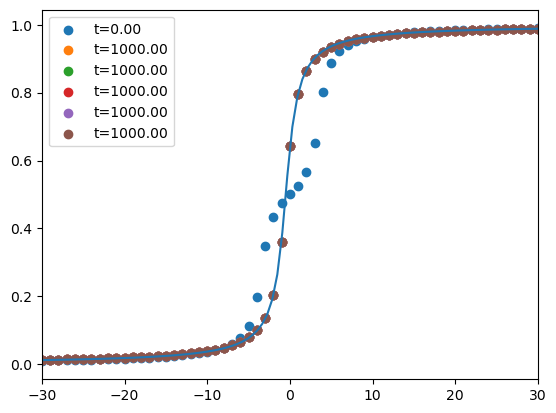

In [51]:
for i in range(0,101,20):
    plt.scatter(lspan, u_result[i, :, 0], label=f't={t_result[i]:.2f}')
    plt.xlim(-30, 30)
plt.legend()
k0 = 0.9 / d
x = np.linspace(-30*b, 30*b, 100)
u = (b / np.pi) * np.arctan(k0 * (x+0.5)) + b / 2
plt.plot(x, u)
plt.show()

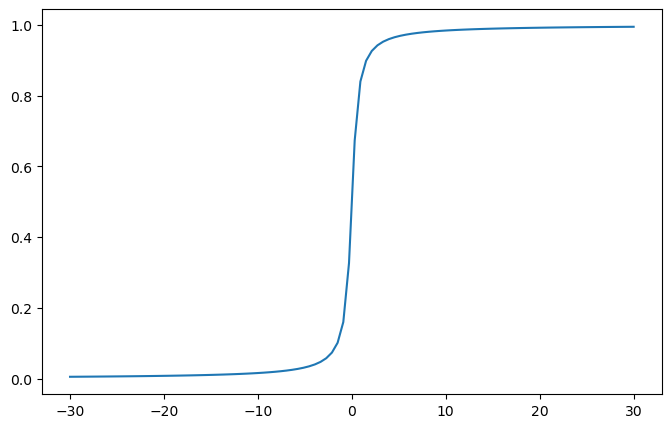

In [39]:
plt.figure(figsize=(8, 5))
k0 = 2 / d
x = np.linspace(-30*b, 30*b, 100)
u = (b / np.pi) * np.arctan(k0 * x)+b/2
plt.plot(x, u)
plt.show()